In [12]:
from preprocess import load_data, clean_data
from metrics import display_metrics, display_conf_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = load_data()
df = clean_data(df)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1359, 12)

In [5]:
X = df.drop('quality', axis=1)
y = df.quality.values

In [6]:
# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=41)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(1087, 11) (1087,)
(272, 11) (272,)


## Models

### Logistic Regression

In [7]:
# Normalize the dataset
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

In [8]:
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=41)
log_reg.fit(X_train_sc, y_train)

LogisticRegression(multi_class='ovr', random_state=41, solver='liblinear')

In [9]:
y_val_pred_log_reg = log_reg.predict(X_val_sc)

In [10]:
display_metrics(y_val, y_val_pred_log_reg)

accuracy: 0.5588235294117647
precision: 0.5318112010295388
recall: 0.5588235294117647
classification repoort:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.63      0.69      0.66       116
           6       0.49      0.64      0.56       107
           7       0.57      0.12      0.20        33
           8       0.00      0.00      0.00         3

    accuracy                           0.56       272
   macro avg       0.28      0.24      0.24       272
weighted avg       0.53      0.56      0.52       272



/home/lenovo/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lenovo/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lenovo/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

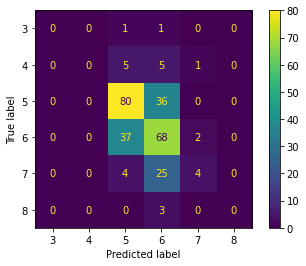

In [11]:
display_conf_matrix(y_val, y_val_pred_log_reg)

### KNeighbors Classifier

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [14]:
y_val_pred_knn = knn.predict(X_val_sc)

In [15]:
display_metrics(y_val, y_val_pred_knn)

accuracy: 0.5220588235294118
precision: 0.4983537505058309
recall: 0.5220588235294118
classification repoort:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.61      0.65      0.63       116
           6       0.49      0.53      0.51       107
           7       0.38      0.30      0.34        33
           8       0.00      0.00      0.00         3

    accuracy                           0.52       272
   macro avg       0.25      0.25      0.25       272
weighted avg       0.50      0.52      0.51       272



/home/lenovo/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lenovo/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lenovo/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

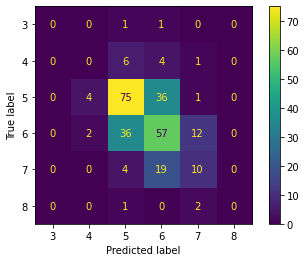

In [16]:
display_conf_matrix(y_val, y_val_pred_knn)